# Coursera: Python Project for Data Science 
## Module 5 in Professional Certificate

This project done through Coursera involved analysing stock and revenue data for Tesla and Gamestop and building a dashboard. Stock data was obtained using the yfinance library in python and quarterly revenue data was obtained from the website https://www.macrotrends.net/

Although the project only entailed building a dashboard for the above two companies I decided to run the analyses on a total of 6 companies; Tesla, Apple, Amazon, Microsoft, Facebook and Gamestop. These six companies are the top six US stocks by dollar volume according to macrotrends.net as of 29/03/2021.

In [3]:
# install the necessary libraries
!pip install yfinance
!pip install pandas
!pip install requests
!pip install bs4
!pip install plotly

In [4]:
#import the libraries
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [5]:
#Define the graph function
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Tesla

### yfinance to extract stock data

In [7]:
tesla = yf.Ticker('TSLA')

In [8]:
tesla_data = tesla.history(period='max')

In [9]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


### Webscraping to extract revenue data

In [10]:
html_data = requests.get("https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue").text

In [11]:
soup = BeautifulSoup(html_data, 'html.parser')

In [12]:
tesla_revenue = pd.DataFrame(columns=["Date","Revenue"])

tables = soup.find_all('table')[1]
for row in tables.tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        date = col[0].text
        revenue = col[1].text.replace('$','').replace(',','')
        tesla_revenue = tesla_revenue.append({"Date":date,"Revenue":revenue}, ignore_index=True)

In [15]:
#drop null values/ empty strings
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [14]:
tesla_revenue.tail()

,Date,Revenue
41,2010-09-30,31
42,2010-06-30,28
43,2010-03-31,21
45,2009-09-30,46
46,2009-06-30,27


## Apple

### yfinance to extract stock data

In [16]:
apple = yf.Ticker('AAPL')

In [17]:
apple_data = apple.history(period = 'max')

In [18]:
apple_data.reset_index(inplace = True)
apple_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.100922,0.101361,0.100922,0.100922,469033600,0.0,0.0
1,1980-12-15,0.096096,0.096096,0.095657,0.095657,175884800,0.0,0.0
2,1980-12-16,0.089075,0.089075,0.088636,0.088636,105728000,0.0,0.0
3,1980-12-17,0.090830,0.091268,0.090830,0.090830,86441600,0.0,0.0
4,1980-12-18,0.093463,0.093902,0.093463,0.093463,73449600,0.0,0.0


### Webscraping to extract revenue data

In [19]:
html_data1 = requests.get('https://www.macrotrends.net/stocks/charts/AAPL/apple/revenue').text

In [20]:
soup1 = BeautifulSoup(html_data1, 'html.parser')

In [21]:
apple_revenue = pd.DataFrame(columns=["Date","Revenue"])

tables = soup1.find_all('table')[1]
for row in tables.tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        date = col[0].text
        revenue = col[1].text.replace('$','').replace(',','')
        apple_revenue = apple_revenue.append({"Date":date,"Revenue":revenue}, ignore_index=True)

In [22]:
apple_revenue.dropna(inplace=True)
apple_revenue = apple_revenue[apple_revenue['Revenue'] != ""]

In [23]:
apple_revenue.tail()

,Date,Revenue
59,2006-03-31,4359
60,2005-12-31,5749
61,2005-09-30,3678
62,2005-06-30,3520
63,2005-03-31,3243


## Amazon

### yfinance to extract stock data

In [24]:
amazon = yf.Ticker('AMZN')

In [25]:
amazon_data = amazon.history(period = 'max')

In [26]:
amazon_data.reset_index(inplace = True)
amazon_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,72156000,0,0.0
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,14700000,0,0.0
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,6106800,0,0.0
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,5467200,0,0.0
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,18853200,0,0.0


### Webscraping to extract revenue data

In [27]:
html_data2 = requests.get('https://www.macrotrends.net/stocks/charts/AMZN/amazon/revenue').text

In [28]:
soup2 = BeautifulSoup(html_data2, 'html.parser')

In [29]:
amazon_revenue = pd.DataFrame(columns=["Date","Revenue"])

tables = soup2.find_all('table')[1]
for row in tables.tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        date = col[0].text
        revenue = col[1].text.replace('$','').replace(',','')
        amazon_revenue = amazon_revenue.append({"Date":date,"Revenue":revenue}, ignore_index=True)

In [30]:
amazon_revenue.dropna(inplace=True)
amazon_revenue = amazon_revenue[amazon_revenue['Revenue'] != ""]

In [31]:
amazon_revenue.tail()

,Date,Revenue
59,2006-03-31,2279
60,2005-12-31,2977
61,2005-09-30,1858
62,2005-06-30,1753
63,2005-03-31,1902


## Microsoft

### yfinance to extract stock data

In [32]:
microsoft = yf.Ticker('MSFT')

In [33]:
microsoft_data = microsoft.history(period = 'max')

In [34]:
microsoft_data.reset_index(inplace = True)
microsoft_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1986-03-13,0.056238,0.064508,0.056238,0.061751,1031788800,0.0,0.0
1,1986-03-14,0.061751,0.065059,0.061751,0.063956,308160000,0.0,0.0
2,1986-03-17,0.063956,0.065610,0.063956,0.065059,133171200,0.0,0.0
3,1986-03-18,0.065059,0.065610,0.062853,0.063405,67766400,0.0,0.0
4,1986-03-19,0.063405,0.063956,0.061751,0.062302,47894400,0.0,0.0


### Webscraping to extract revenue data

In [35]:
html_data3 = requests.get('https://www.macrotrends.net/stocks/charts/MSFT/microsoft/revenue').text

In [36]:
soup3 = BeautifulSoup(html_data3, 'html.parser')

In [37]:
microsoft_revenue = pd.DataFrame(columns=["Date","Revenue"])

tables = soup3.find_all('table')[1]
for row in tables.tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        date = col[0].text
        revenue = col[1].text.replace('$','').replace(',','')
        microsoft_revenue = microsoft_revenue.append({"Date":date,"Revenue":revenue}, ignore_index=True)

In [39]:
microsoft_revenue.dropna(inplace=True)
microsoft_revenue = microsoft_revenue[microsoft_revenue['Revenue'] != ""]

In [40]:
microsoft_revenue.tail()

,Date,Revenue
59,2006-03-31,10900
60,2005-12-31,11837
61,2005-09-30,9741
62,2005-06-30,10161
63,2005-03-31,9620


## Facebook

###  yfinance to extract stock data

In [41]:
facebook = yf.Ticker("FB")

In [43]:
facebook_data = facebook.history(period = 'max')

In [44]:
facebook_data.reset_index(inplace = True)
facebook_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,573576400,0,0
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,168192700,0,0
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,101786600,0,0
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,73600000,0,0
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,50237200,0,0


### Webscraping to extract revenue data 

In [45]:
html_data4 = requests.get('https://www.macrotrends.net/stocks/charts/FB/facebook/revenue').text

In [46]:
soup4 = BeautifulSoup(html_data4, 'html.parser')

In [47]:
facebook_revenue = pd.DataFrame(columns=["Date","Revenue"])

tables = soup4.find_all('table')[1]
for row in tables.tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        date = col[0].text
        revenue = col[1].text.replace('$','').replace(',','')
        facebook_revenue = facebook_revenue.append({"Date":date,"Revenue":revenue}, ignore_index=True)

In [48]:
facebook_revenue.dropna(inplace=True)
facebook_revenue = facebook_revenue[facebook_revenue['Revenue'] != ""]

In [49]:
facebook_revenue.tail()

,Date,Revenue
39,2011-03-31,731
40,2010-12-31,731
41,2010-09-30,467
42,2010-06-30,431
43,2010-03-31,345


## Gamestop

### yfinance to extract stock data

In [50]:
gamestop = yf.Ticker("GME")

In [51]:
gme_data = gamestop.history(period="max")

In [52]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,6.480513,6.773399,6.413183,6.766666,19054000,0.0,0.0
1,2002-02-14,6.850831,6.864296,6.682506,6.733003,2755400,0.0,0.0
2,2002-02-15,6.733001,6.749833,6.632006,6.699336,2097400,0.0,0.0
3,2002-02-19,6.665671,6.665671,6.312189,6.430017,1852600,0.0,0.0
4,2002-02-20,6.463681,6.648838,6.413183,6.648838,1723200,0.0,0.0


### Webscraping to extract revenue data

In [53]:
html_data5 = requests.get("https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue").text

In [54]:
soup5 = BeautifulSoup(html_data5, 'html.parser')

In [55]:
gme_revenue = pd.DataFrame(columns=["Date","Revenue"])

tables = soup5.find_all('table')[1]
for row in tables.tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        date = col[0].text
        revenue = col[1].text.replace('$','').replace(',','')
        gme_revenue = gme_revenue.append({"Date":date,"Revenue":revenue}, ignore_index=True)

In [56]:
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

In [57]:
gme_revenue.tail()

,Date,Revenue
59,2006-01-31,1667
60,2005-10-31,534
61,2005-07-31,416
62,2005-04-30,475
63,2005-01-31,709


## Plot the graphs

The graphs are not compatible with Github, therefore images of the graphs have been uploaded into a markdown cell below each line of code.

In [74]:
#make_graph(tesla_data, tesla_revenue, 'Tesla')

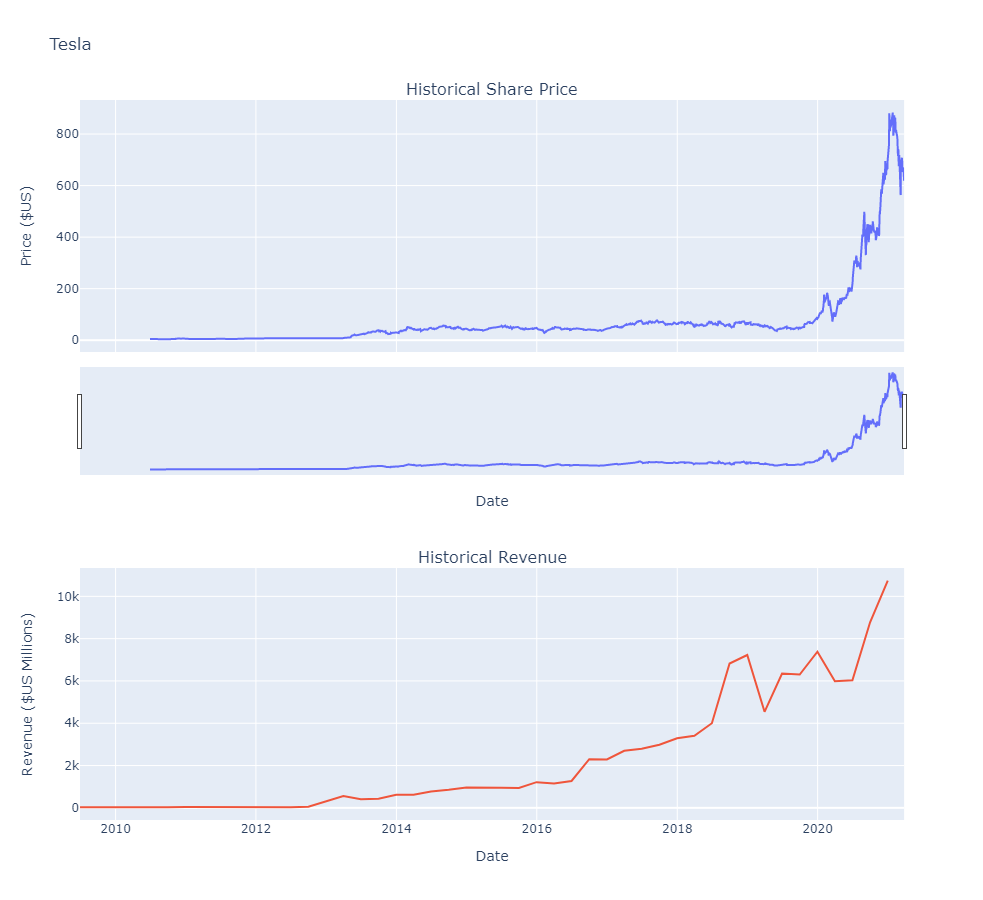

In [76]:
#make_graph(apple_data, apple_revenue, 'Apple')

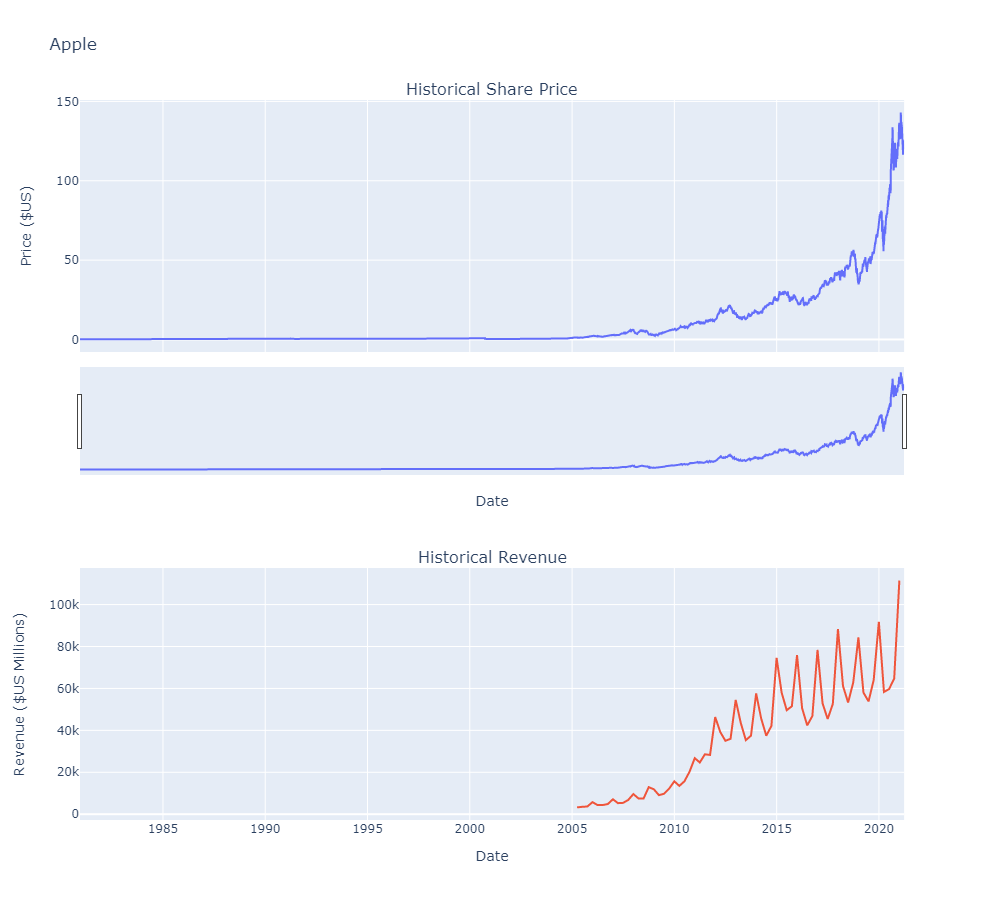

In [68]:
#make_graph(amazon_data, amazon_revenue, 'Amazon')

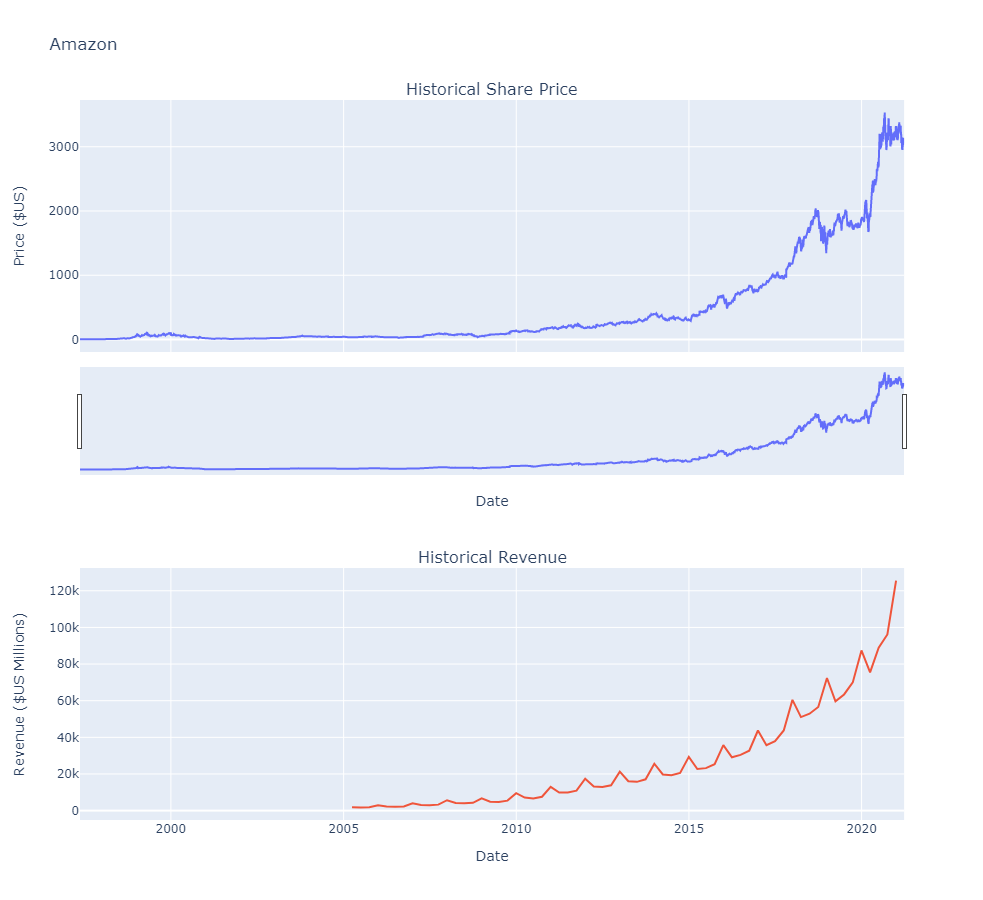

In [69]:
#make_graph(microsoft_data, microsoft_revenue, 'Microsoft')

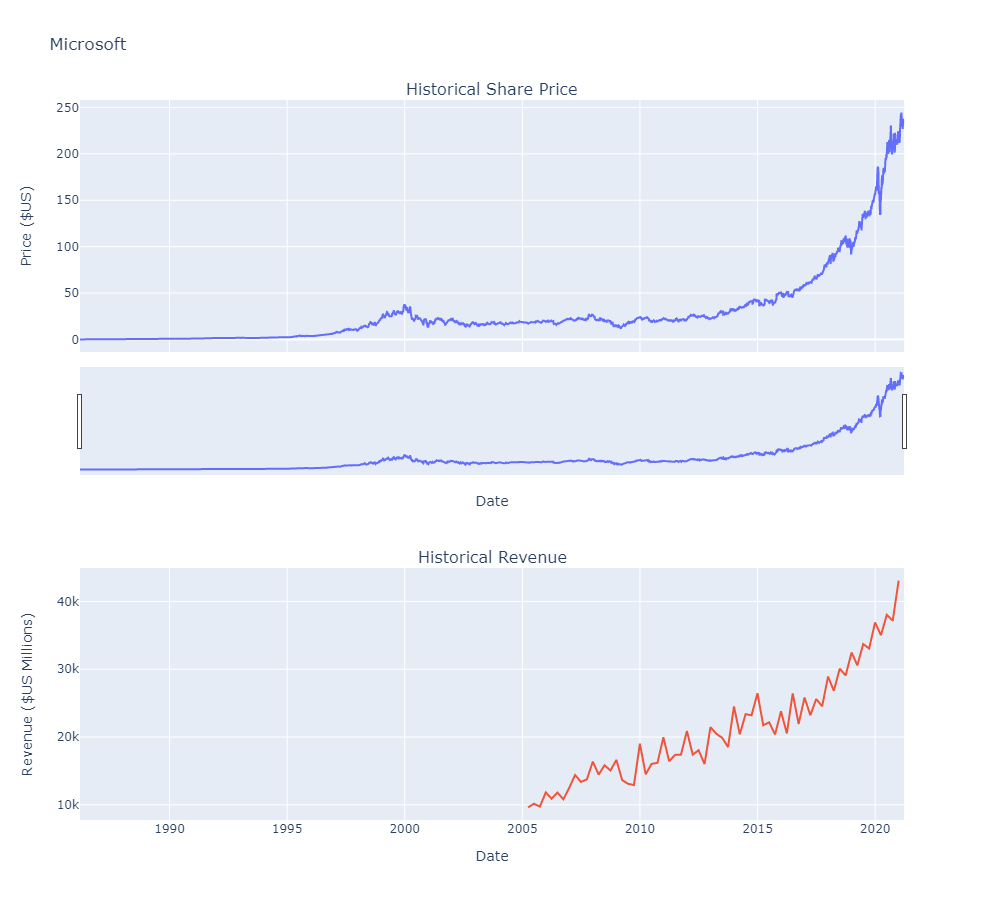

In [70]:
#make_graph(facebook_data, facebook_revenue, 'Facebook')

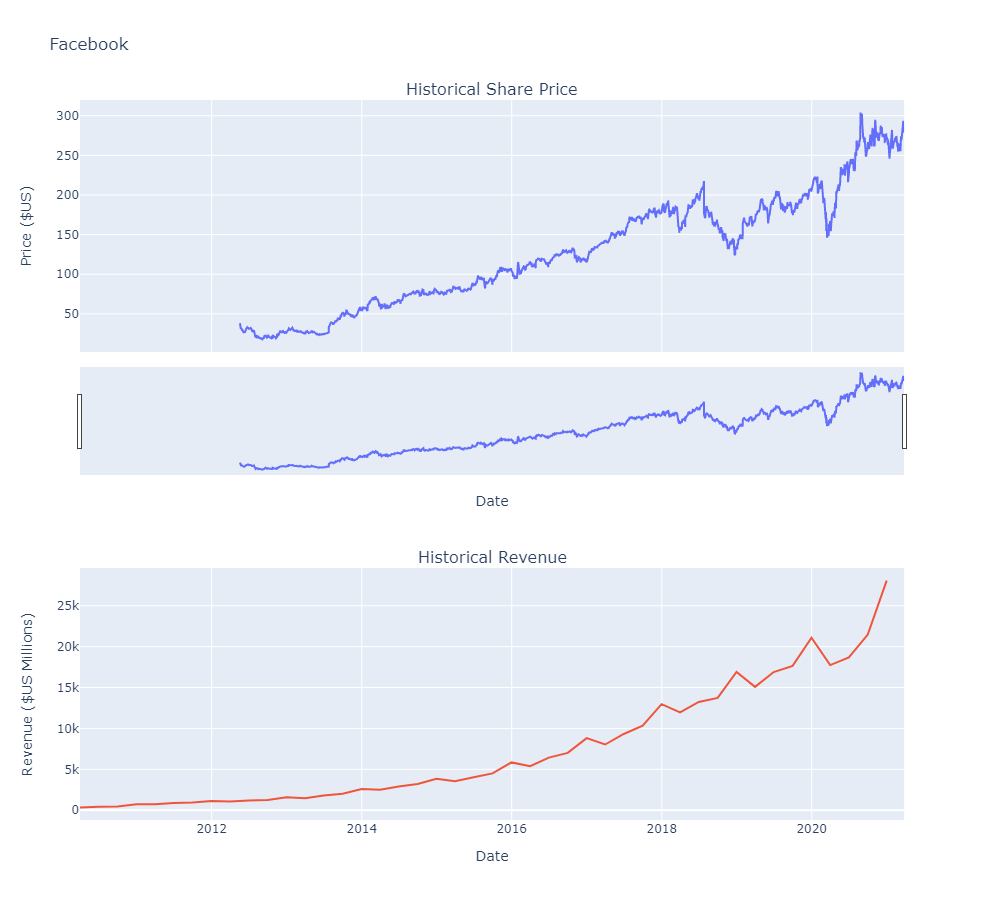

In [72]:
#make_graph(gme_data, gme_revenue, 'GameStop')

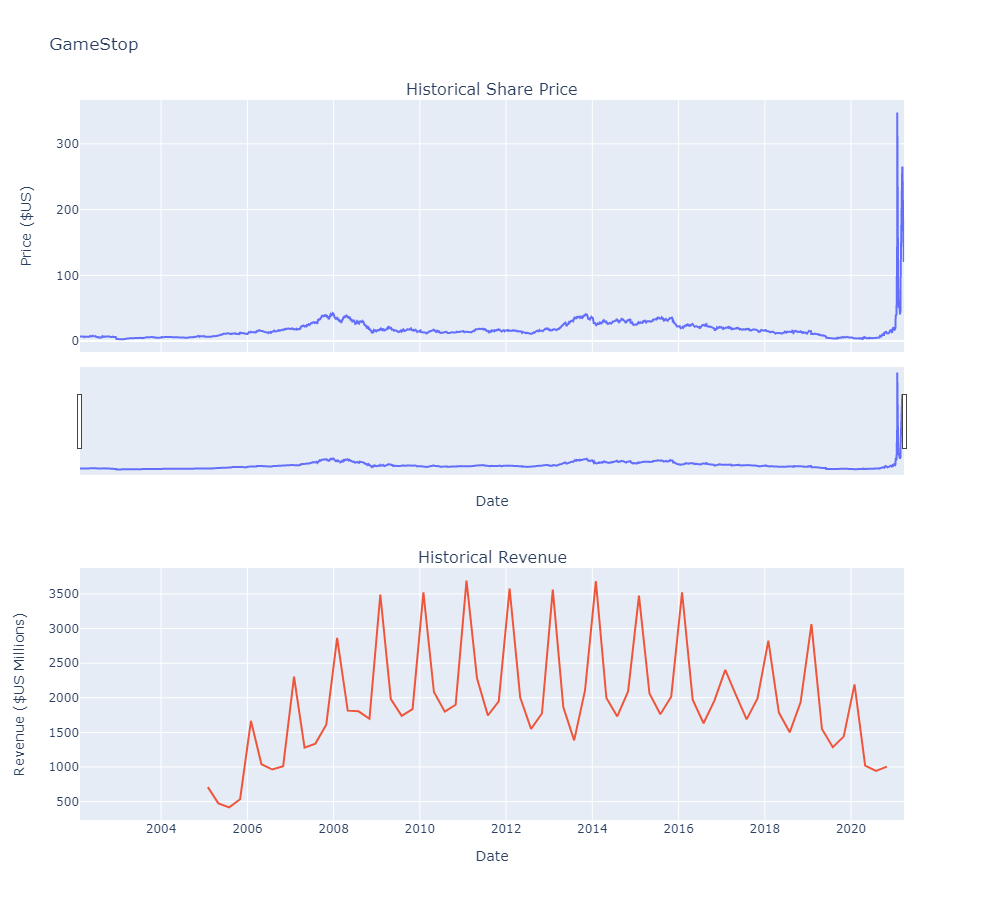